In [1]:
#Exploration of Titanic Dataset 

#This notebook describes the process by which you can arrive at 80
#percentage of accuracy in predicting survival for members of the Titanic Data Set.
    #The information in this notebook is related to the tragedy of the Titanic in 1912 and I mean
    #no disrepsect to the deceased, may they rest in peace.
    

In [2]:
#prep
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("Data/train.csv")

In [3]:
#Part 1 - Data Exploration and Cleaning
#The first order of buisness is to ensure that every columns
#in the dataframe is usable. This consists of ensuring all data has a value
#taking care of outliers and removing any multicolinearity among the data

In [4]:
#Let us have a glance at the data, below are the first few rows as well 
#as the preliminary description of statistical measures

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#The first thing we must draw our attention to is the field we must predict
#which will offer us insight on how to proceed. Survived column consists  
#of binary 0 or 1 values, so this project becomes a classification problem.

#Now to look at the actual data that we do have. 
#We have 5 numerical columns; Pclass, Age, SibSp, Parch and Fare
#and 5 categorical columsn; Name, Sex Ticket, Cabin and Embarked

#There are some that are very clearly delineated for us, such as 
#PClass {1-3}, Sex{female/male}, Age, Fare, Embarked{S, C, Q}
#These do not require much formating to be usable

#The left over ones are PassengerID which is an ID field that will I 
#will naturally drop, the Name class which is a simple string that could 
#handled if we so wanted using the most common key words technique,
#Ticket which is a id number with varying formating, which can possibly
#give some formating if used to relate people and collectively determine
#the survival rate. There are also Parch and SibSp, which are clearly 
#usable but have less significant values, as shown by the recurring 
#values in the percentiles for those two fields. Especially Parch does
#not seem like it will yield any value purely by itself, though there may
#be a way to combine it. 

In [9]:
#1.1 - Missing values

In [10]:
#Here are the following columns where values were found to be missing
#The first was "Age"

In [11]:
df["Missing"] = df["Age"].isnull()
missing_name = df[df.Missing == True]
missing_name.shape


(177, 13)

In [12]:
#in "Cabin"
df["Missing"] = df["Cabin"].isnull()
missing_name = df[df.Missing == True]
missing_name.shape # a large ammount missing here? Perhaps remove

(687, 13)

In [13]:
#and lastly in "Embarked"
df["Missing"] = df["Embarked"].isnull()
missing_name = df[df.Missing == True]
missing_name.shape

(2, 13)

In [14]:
#remove the extra column
df = df.drop(["Missing"], axis = 1)

In [15]:
#First immediately actionable step - the missing values for cabin are over half the dataset, and given that the data is
#not intuitively useful, I will drop the column as to not corrupt the data. This is not to say this is the only course
#of action that could have been taken, we could have combined it with a different column, however in this case I do
#not feel it was needed.
df = df.drop(["Cabin"], axis = 1) #not enough data

In [16]:
#2.2 Outliers 
#There are techniques far and wide to handle outliers in data. The choice is a matter of expertise as well 
#as personal taste. 
#In the name of perserving as much data as possible, especially because we have a relatively small number of rows 
#compared to the usual standard, I will not drop the rows with the missing values. Instead, I shall replace it with 
#values that will not skew the data significantly. For numerical data, I will replace the empty value using 
#percentiles and I shall use the mode for categorical data.

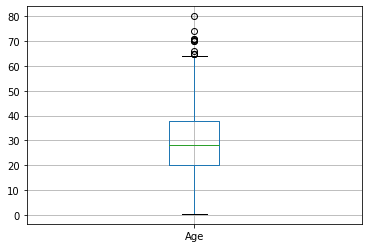

In [17]:
#Age
df.boxplot(column="Age")

In [18]:
nan_05 = np.nanpercentile(df["Age"],5)
nan_95 = np.nanpercentile(df["Age"],95) 
df["Age"]= df["Age"].apply(lambda x: nan_95 if x > nan_95 else x)
df["Age"]= df["Age"].apply(lambda x: nan_05 if x < nan_05 else x)

In [19]:
age_mean = df["Age"].mean()
df["Age"] =df["Age"].apply(lambda x: age_mean if np.isnan(x) else x)

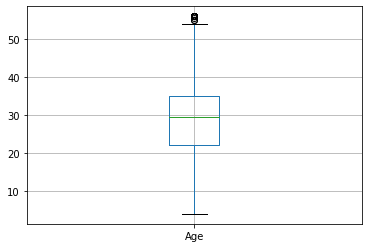

In [20]:
df.boxplot(column="Age")

In [21]:
#Embarked
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [22]:
df["Embarked"] = df["Embarked"].apply(lambda x: "S" if pd.isnull(x) else x)

In [23]:
df["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

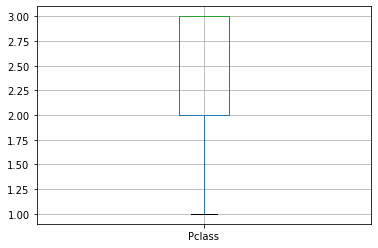

In [24]:
#Finally remove outliers in data without nans
df.boxplot(column="Pclass")

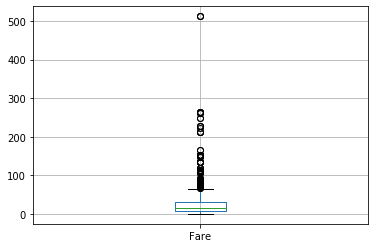

In [25]:
df.boxplot(column="Fare")

In [26]:
fare_05 = np.percentile(df["Fare"], 5)
fare_95 = np.percentile(df["Fare"], 85)
df["Fare"] = df["Fare"].apply(lambda x: fare_05 if x < fare_05 else x)
df["Fare"] = df["Fare"].apply(lambda x: fare_95 if x > fare_95 else x)

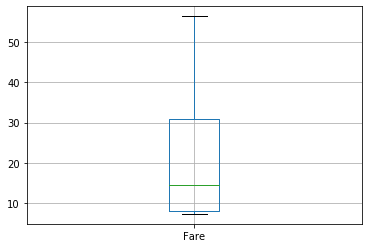

In [27]:
df.boxplot(column="Fare")

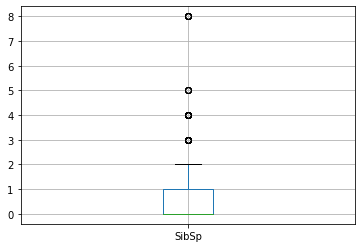

In [28]:
df.boxplot(column="SibSp")

In [29]:
Sib_05 = np.percentile(df["SibSp"], 5)
Sib_95 = np.percentile(df["SibSp"], 90)
df["SibSp"] = df["SibSp"].apply(lambda x: Sib_05 if x < Sib_05 else x)
df["SibSp"] = df["SibSp"].apply(lambda x: Sib_95 if x > Sib_95 else x)

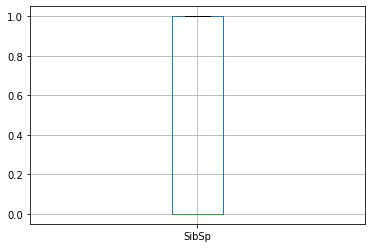

In [30]:
df.boxplot(column ="SibSp")

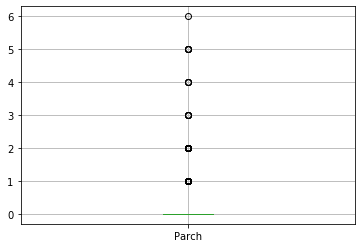

In [31]:
df.boxplot(column="Parch")

In [32]:
#wow??? - what a thing
#This is quite a goofy-looking column, I must admit it is giving me much enjoyment

In [33]:
Par_05 = np.percentile(df["Parch"], 5)
Par_95 = np.percentile(df["Parch"], 75)
df["Parch"] = df["Parch"].apply(lambda x: Par_05 if x < Par_05 else x)
df["Parch"] = df["Parch"].apply(lambda x: Par_95 if x > Par_95 else x)

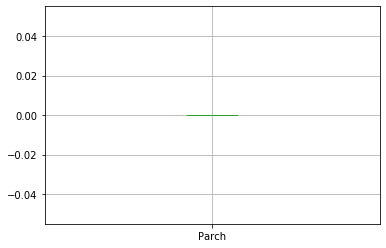

In [34]:
df.boxplot(column="Parch") #Wow

In [35]:
#1.3 Dropping columns

#An unorthodox choice perhaps, but in the interests of keeping my data clean, I will simply drop columns that do
#not fit my current strategy for aproaching the dataset, which relies on binning data acording to visual insight.
#In future work, these columns would most certainly be useful if we were to attempt to group families in order
#to gain insight. Especially name and Parch. Another time.

In [36]:
df=df.drop("Ticket", axis=1)

In [37]:
df=df.drop("PassengerId", axis=1)

In [38]:
df= df.drop("Name", axis=1)

In [39]:
df= df.drop("Parch", axis=1)

In [40]:
#Part 2 - Exploratory Data Analysis
#Here onwards we have to choose a path; to build a model using categorical data, numerical data or both? That is the
#question. While the effectiveness of one versus the othr is not the point of this notebook, it should suffice to say 
#that I tried both options for this specific data and found that categorical data generally performs better.

#So we have chosen categorical data, and now we move on to the star of this stage. This is an exploratory notebook 
#which concentrates on pushing the limits of pure categorical data derived from insights. This relies on the ability 
#of a person to see the trends in the data with the help of visual representation.

In [41]:
#Lets look at what we have to work with
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked'], dtype='object')

In [42]:
#2.1 Correlation Matrix
#Ever essential, the most important tool, and our most faithful asistant to help us quickly reach convergence.
#The correlation matrix allows us to see multicolinearity between variables, which we want to nip at the root.

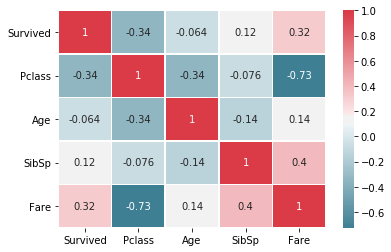

In [43]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df.corr(), linewidths=.5, cmap = cmap, annot=True)

In [44]:
#Thoughts; 
#Ignoring the Survived Column which we want to be correlated with all the variables, we can see the highest values are 
#the following;
#0.73 negative correlation between Pclass and Fare - we need to handle that for sure
#0.34 negative correlation between Pclass and Age
#0.40 positive correlation between Fare and SibSP
#these clases need to be combined, in one form or the other.
#It seems that the biggest offenders are Pclass and Fare, so we will take extra care with that

In [45]:
#It is also important to bin the continous values to convert them to categorical, so we will
#look at each attribute in turn, so we will begin with that 

In [46]:
#2.2 Sex - 1/6
#The data is properly split into categorical values and  does not need any combining, so we do not need to touch it

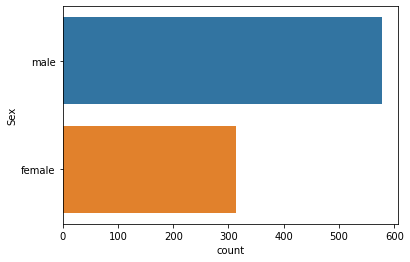

In [47]:
sns.countplot(y="Sex", data=df);

In [48]:
#2.3 Embarked - 2/6
#Once more the data is properly binned and independent, so we can move beyond this one as well

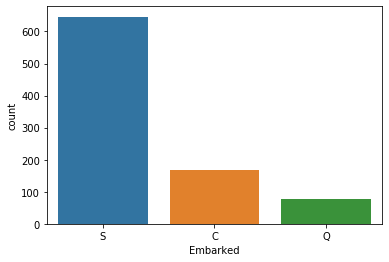

In [49]:
sns.countplot("Embarked", data = df)

In [50]:
#2.4 Pclass - 3/6 
#It is nicely split, but this data will be dropoed later so it makes no difference

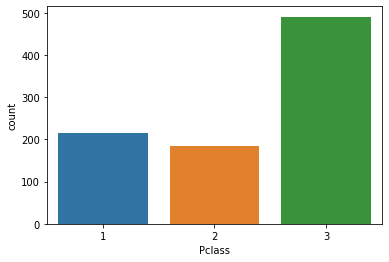

In [51]:
sns.countplot("Pclass", data = df)

In [52]:
#2.5 Age - 4/6 
#This class will remain within the dataset but must be split acordingly
#Lets create several columns to represent which part of the Age graph the value is in
#These new columns will only hold 0 or 1

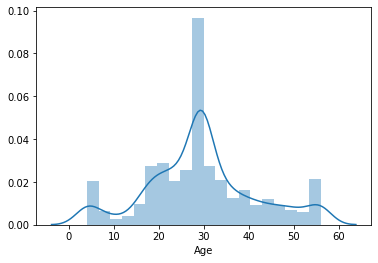

In [53]:
sns.distplot(df["Age"])

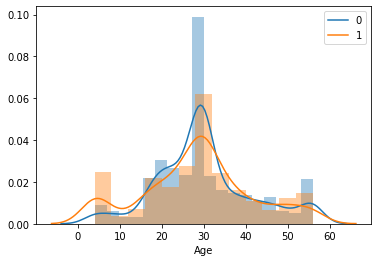

In [54]:
sns.distplot(df[df["Survived"] == 0]["Age"], kde_kws={"label":"0"})
sns.distplot(df[df["Survived"] == 1]["Age"], kde_kws={"label":"1"})

In [55]:
df["Age_One"] = df["Age"].apply(lambda x: 1 if x <= 10 else 0)
df["Age_Two"] = df["Age"].apply(lambda x: 1 if x > 10 and x <= 20 else 0)
df["Age_Three"] = df["Age"].apply(lambda x: 1 if x > 20 and x <= 25 else 0) #20 to 25???
df["Age_Four"] = df["Age"].apply(lambda x: 1 if x > 25 and x <= 35 else 0)
df["Age_Five"] = df["Age"].apply(lambda x: 1 if x > 35 and x <= 40 else 0)
df["Age_Six"] = df["Age"].apply(lambda x: 1 if x > 40 and x <= 50 else 0)
df["Age_Seven"] = df["Age"].apply(lambda x: 1 if x > 50 and x <= 60 else 0)
df["Age_Eight"] = df["Age"].apply(lambda x: 1 if x > 60 else 0)

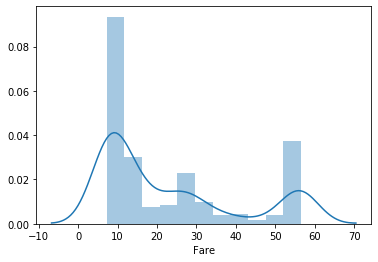

In [56]:
#2.5 Fare - 5/6
#We could follow the same method used for Age, but this is another column that will be dropped, so we leave as is
sns.distplot(df["Fare"])

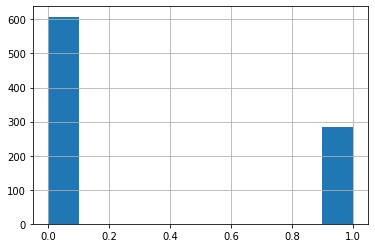

In [57]:
#2.7 SibSp - 6/6
#The final class, this one will also remain and so we must bin it. However, while it is a continous value, it has
#already been split in practice, so this is a farely simple matter. Simply split to values of 0 and 1, though we will
#use values greater than 0 for the second column just in case the data were to introduce greater values
df["SibSp"].hist()

In [58]:
df["SibSp_0"] = df["SibSp"].apply(lambda x: 1 if(x == 0) else 0)
df["SibSp_1"] = df["SibSp"].apply(lambda x: 1 if(x > 0) else 0)

In [59]:
#Prelude: 
#The next section continues with the combination of various fields in order to give the algorithms better information
#from the start. We will combine values as seen discussed previously to remove
#multicolinearity, and we will also combine values in relation to my own domain 
#knowledge about theings that are likely to affect the priority of the people who 
#lived back then in that time. Again we will focus on dividing the data into sub categories
#where a row can have a value of 1 if it is in that category, otherwise it will have a value of 0

In [60]:
#2.8 Combinatory values - Sex and Age
#Firstly, I'd like to begin with some domain knowledge. It is quite likely that women
#and children were let off the boat with higher priority than those not belonging to
#those categories, and perhaps a combination of those two values may give us even
#greater insight into the solution of the problem. 

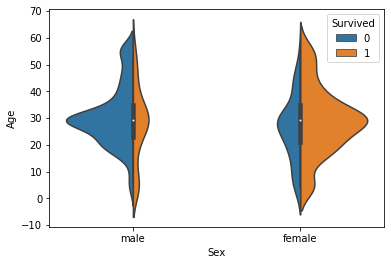

In [61]:
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True, scale='count');

In [62]:
#Observations regarding Sex and Age ---
#There is a very clear division here, confirming our choice of combinatorial
#values. 
#Notice the two peaks that occur around 30 for men and 35 for women which have
#completely inverse survival rates. These must definetly considered.
#We must split the periods of rapid growth and rapid decrease that happen
#around the peaks, thus we must split into much smaller groups. 

#Here are the following chosen divisions:
#Women divisions ->
#over 60 
#60 to 40 
#40 to 35 
#35 to 20 
#20 to 15
#15 to 10
#10 to 0
# men divisions ->
# over 60 
#60 to 40 
#40 to 35 
#35 to 25 
#25 to 20 
#20 to 18 
#18 to 10 
#10 to 0 

In [63]:
#Women age
df["Womeno60"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age >= 60) else 0, axis=1)
df["Women6040"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 60 and x.Age >= 40) else 0, axis=1)
df["Women4035"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 40 and x.Age >= 35) else 0, axis=1)
df["Women3520"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 35 and x.Age >= 20) else 0, axis=1)
df["Women2015"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 20 and x.Age >= 15) else 0, axis=1)
df["Women1510"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 15 and x.Age >= 10) else 0, axis=1)
df["Womenu10"] =df.apply(lambda x: 1 if (x.Sex == "female" and x.Age < 10) else 0, axis=1)


In [64]:
#Men age
df["Meno60"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age >= 60) else 0, axis=1)
df["Men6040"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 60 and x.Age >= 40) else 0, axis=1)
df["Men4035"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 40 and x.Age >= 35) else 0, axis=1)
df["Men3525"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 35 and x.Age >= 25) else 0, axis=1)
df["Men2520"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 25 and x.Age >= 20) else 0, axis=1)
df["Men2018"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 20 and x.Age >= 18) else 0, axis=1)
df["Men1810"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 15 and x.Age >= 10) else 0, axis=1)
df["Menu10"] =df.apply(lambda x: 1 if (x.Sex == "male" and x.Age < 10) else 0, axis=1)


In [65]:
#2.9 Combinatory values - Pclass and Age
#These two are interesting; there are different spreads of ages in each class
#as shown in the graph below, as there were more elderly in class 1 than in any
#other class, quite a bit of people died in class 1, contrary to what one would
#expect. On the other hand the sample size of class 3 is much smaller than the 
#others, which may make classifiying those in that class harder.

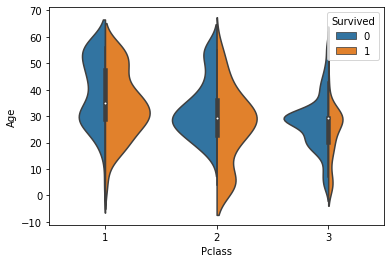

In [66]:
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, scale='count');

In [67]:
#Observations Regarding Class and Age --
#There is quite a large peak at the third class from 25 to 30, which dominates
#most of that graph, the only significant factor for survival in class 3 is
#from 25 to 30, the same as the peak. Therefore, it will probably be hard to
#predict. 
#In class 2 again, the peak in both directions is in the same place, but there
#is quite a significance after age 15 in terms of survival so that will probably
#be an indicator. 
#lass one follow the same pattern, there is only a great difference around 35 to
#45.

#Passenger Class Age
# Pclass 3 divisions ->
#over 42
#42 to 25
#25 to 15 
#15 to 10
#10 to 0 
#Plcass 2 divisions -> 
#over 60
#60 to 40
#40 to 30
#30 to 25
#25 to 20
#20 to 15
#15 yo 0
#Pclass 1 divisions ->
#over 70
#70 to 55
#55 to 45
#45 to 35
#35 to 20
#20 to 10
#10 to 0

In [68]:
#Pclass 3 age
df["Class3o42"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age >= 42) else 0, axis=1)
df["Class34225"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 42 and x.Age >= 25) else 0, axis=1)
df["Class32515"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 25 and x.Age >= 15) else 0, axis=1)
df["Class31510"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 15 and x.Age >= 10) else 0, axis=1)
df["Class3u10"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Age < 10) else 0, axis=1)

In [69]:
#Pclass 2 age
df["Class2o60"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age >= 60) else 0, axis=1)
df["Class26040"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 60 and x.Age >= 40) else 0, axis=1)
df["Class24030"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 40 and x.Age >= 30) else 0, axis=1)
df["Class23025"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 30 and x.Age >= 25) else 0, axis=1)
df["Class22520"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 25 and x.Age >= 20) else 0, axis=1)
df["Class22015"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 20 and x.Age >= 15) else 0, axis=1)
df["Class2u15"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Age < 15 ) else 0, axis=1)


In [70]:
#Pclass 1 age
df["Class1o70"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age >= 70) else 0, axis=1)
df["Class17055"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 70 and x.Age >= 55) else 0, axis=1)
df["Class15545"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 55 and x.Age >= 45) else 0, axis=1)
df["Class14535"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 45 and x.Age >= 35) else 0, axis=1)
df["Class13520"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 35 and x.Age >= 20) else 0, axis=1)
df["Class12010"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 20 and x.Age >= 10) else 0, axis=1)
df["Class1u10"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Age < 10 ) else 0, axis=1)

In [71]:
#2.10 Combinatory values - Fare and Class
#Now this is interesting for sure. It seemsthere is a pattern of a lower fare leading to a 
#lower survival rate across all three classes. Perhaps the cabins with lower fares were lower in 
#the ship's structure? There does not seem to be any correlation at all for class 3 though.

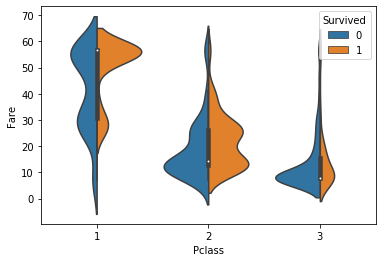

In [72]:
sns.violinplot(x='Pclass', y='Fare', hue='Survived', data=df, split=True, scale='count');

In [73]:
#Observations Regarding Class and Fare --
#It seems those from the first class that did not survive were pretty spread out acording to fare, but there is a peak
#at the very top which may be significant. Below a point, the first class does not seem to survive, so that is a strong
#indication. Second class is quite evern butthe peak of survival is slightly higher than the other at higher fares, and
#slightly lower at lower fares. As far as class 3, it does not seem to have an effect. There is no point where the 
#chance of survival is more than the chance to not survive. 

#Class 3 divisions ->
#over 50
#50 to 25
#25 to 20
#15 to 10
#10 to 8
#under 8

#Class 2 divisions ->
#over 75
#75 to 60
#60 to 40
#40 to 30
#30 to 20
#20 to 15
#15 to 5
#under 5

#Class 1 divisions ->
#over 120
#120 to 100
#100 to 80
#80 to 70
#70 to 50
#50 to 25
#25 to 20
#20 to 15
#under 15


In [74]:
#Class 3 Fare
df["Class3Fo50"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare >= 50) else 0, axis=1)
df["Class3F5025"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 50 and x.Fare >= 25) else 0, axis=1)
df["Class3F2520"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 25 and x.Fare >= 20) else 0, axis=1)
df["Class3F2015"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 20 and x.Fare >= 15) else 0, axis=1)
df["Class3F1510"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 15 and x.Fare >= 10) else 0, axis=1)
df["Class3F108"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 10 and x.Fare >= 8) else 0, axis=1)
df["Class3Fu8"] =df.apply(lambda x: 1 if (x.Pclass == 3 and x.Fare < 8 ) else 0, axis=1)

In [75]:
#Class 2 Fare
df["Class2Fo75"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare >= 75) else 0, axis=1)
df["Class2F7560"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 75 and x.Fare >= 60) else 0, axis=1)
df["Class2F6040"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 60 and x.Fare >= 40) else 0, axis=1)
df["Class2F4030"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 40 and x.Fare >= 30) else 0, axis=1)
df["Class2F3020"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 30 and x.Fare >= 20) else 0, axis=1)
df["Class2F2015"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 20 and x.Fare >= 15) else 0, axis=1)
df["Class2Fu15"] =df.apply(lambda x: 1 if (x.Pclass == 2 and x.Fare < 15 ) else 0, axis=1)

In [76]:
#Class 1 Fare
df["Class1Fo120"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare >= 120) else 0, axis=1)
df["Class1F120100"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 120 and x.Fare >= 100) else 0, axis=1)
df["Class1F10080"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 100 and x.Fare >= 80) else 0, axis=1)
df["Class1F8070"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 80 and x.Fare >= 70) else 0, axis=1)
df["Class1F7050"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 70 and x.Fare >= 50) else 0, axis=1)
df["Class1F5025"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 50 and x.Fare >= 25) else 0, axis=1)
df["Class1F2520"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 25 and x.Fare >= 20) else 0, axis=1)
df["Class1F2015"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 20 and x.Fare >= 15) else 0, axis=1)
df["Class1Fu15"] =df.apply(lambda x: 1 if (x.Pclass == 1 and x.Fare < 15 ) else 0, axis=1)

In [77]:
#2.11 Combinatory values - Fare and SibSp
#From here we arise to an interesting hypothesis, which is if you were and individual with a high fare, it was probably
#likely they would find space for you easily, much more easily than finding space for a family. Thus, there are high
#indices of survival amongst individuals. For people in larger groups, it is much more even. but there is a greater
#survival chance at a higher fare. There is a dip at fare 40 for some reason, perhaps its was a specific point in the 
#architecture of the ship that was hit early. 

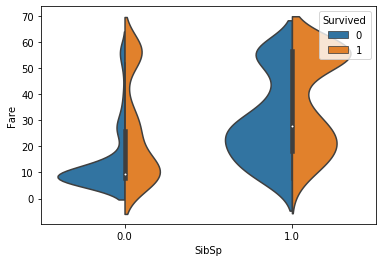

In [78]:
sns.violinplot(x='SibSp', y='Fare', hue='Survived', data=df, split=True, scale='count');

In [79]:
#Observations Regarding SibSp and Fare --
#Low fares have quite a low chance of survival, probably pertaining to those of low paying class 2 and 1, as well as 
#class 3 which have quite a little survival chance. However individuals paying standard class 2 or above prices have 
#a much larger survival chance as shown in the first graph, especially from 20 to 30 and over 50. As far as people with
#families go, that is much more dicy. It is faily even with two peaks either side as you would expect, but it seems 
#this won't be a reliable prediction factor.

#SibSp 0 -->
#over 60
#50 to 60
#35 to 50
#35 to 30
#30 to 15
#15 to 5
#under 5

#SibSp 1->
#over 60
#60 to 50
#50 to 45
#45 to 30
#30 to 10
#under 10

In [80]:
#SibSp 0 Fare
df["Sib0Fo60"] =df.apply(lambda x: 1 if (x.SibSp == 0 and x.Fare >= 60) else 0, axis=1)
df["Sib0F6050"] =df.apply(lambda x: 1 if (x.SibSp == 0 and x.Fare < 60 and x.Fare >= 50) else 0, axis=1)
df["Sib0F5035"] =df.apply(lambda x: 1 if (x.SibSp == 0 and x.Fare < 50 and x.Fare >= 35) else 0, axis=1)
df["Sib0F3530"] =df.apply(lambda x: 1 if (x.SibSp == 0 and x.Fare < 35 and x.Fare >= 30) else 0, axis=1)
df["Sib0F3015"] =df.apply(lambda x: 1 if (x.SibSp == 0 and x.Fare < 30 and x.Fare >= 15) else 0, axis=1)
df["Sib0F1505"] =df.apply(lambda x: 1 if (x.SibSp == 0 and x.Fare < 15 and x.Fare >= 5) else 0, axis=1)
df["Sib0Fu5"] =df.apply(lambda x: 1 if (x.SibSp == 0 and x.Fare < 5) else 0, axis=1)

In [81]:
#SibSp 1 Fare
df["Sib1Fo60"] =df.apply(lambda x: 1 if (x.SibSp == 1 and x.Fare >= 60) else 0, axis=1)
df["Sib1F6050"] =df.apply(lambda x: 1 if (x.SibSp == 1 and x.Fare < 60 and x.Fare >= 50) else 0, axis=1)
df["Sib1F5045"] =df.apply(lambda x: 1 if (x.SibSp == 1 and x.Fare < 50 and x.Fare >= 45) else 0, axis=1)
df["Sib1F4530"] =df.apply(lambda x: 1 if (x.SibSp == 1 and x.Fare < 45 and x.Fare >= 30) else 0, axis=1)
df["Sib1F3010"] =df.apply(lambda x: 1 if (x.SibSp == 1 and x.Fare < 30 and x.Fare >= 10) else 0, axis=1)
df["Sib1Fu10"] =df.apply(lambda x: 1 if (x.SibSp == 1 and x.Fare >= 10) else 0, axis=1)

In [82]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Embarked',
       'Age_One', 'Age_Two', 'Age_Three', 'Age_Four', 'Age_Five', 'Age_Six',
       'Age_Seven', 'Age_Eight', 'SibSp_0', 'SibSp_1', 'Womeno60', 'Women6040',
       'Women4035', 'Women3520', 'Women2015', 'Women1510', 'Womenu10',
       'Meno60', 'Men6040', 'Men4035', 'Men3525', 'Men2520', 'Men2018',
       'Men1810', 'Menu10', 'Class3o42', 'Class34225', 'Class32515',
       'Class31510', 'Class3u10', 'Class2o60', 'Class26040', 'Class24030',
       'Class23025', 'Class22520', 'Class22015', 'Class2u15', 'Class1o70',
       'Class17055', 'Class15545', 'Class14535', 'Class13520', 'Class12010',
       'Class1u10', 'Class3Fo50', 'Class3F5025', 'Class3F2520', 'Class3F2015',
       'Class3F1510', 'Class3F108', 'Class3Fu8', 'Class2Fo75', 'Class2F7560',
       'Class2F6040', 'Class2F4030', 'Class2F3020', 'Class2F2015',
       'Class2Fu15', 'Class1Fo120', 'Class1F120100', 'Class1F10080',
       'Class1F8070', 'Class1F7050', 'C

In [83]:
#2.12 Clean up the final parts
#Time to drop the relevant columns and export the data to a csv file. It may seems strange to drop all these, 
#but they have multicorrelation with the combination values, and Embarked strangely lowers our accuracy.

In [84]:
df = df.drop("Age", axis = 1)
df = df.drop("Fare", axis = 1)
df = df.drop("Pclass", axis = 1)
df = df.drop("SibSp", axis =1)
df = df.drop("Embarked", axis = 1)
df = df.drop("Sex", axis = 1)

In [85]:
df.columns

Index(['Survived', 'Age_One', 'Age_Two', 'Age_Three', 'Age_Four', 'Age_Five',
       'Age_Six', 'Age_Seven', 'Age_Eight', 'SibSp_0', 'SibSp_1', 'Womeno60',
       'Women6040', 'Women4035', 'Women3520', 'Women2015', 'Women1510',
       'Womenu10', 'Meno60', 'Men6040', 'Men4035', 'Men3525', 'Men2520',
       'Men2018', 'Men1810', 'Menu10', 'Class3o42', 'Class34225', 'Class32515',
       'Class31510', 'Class3u10', 'Class2o60', 'Class26040', 'Class24030',
       'Class23025', 'Class22520', 'Class22015', 'Class2u15', 'Class1o70',
       'Class17055', 'Class15545', 'Class14535', 'Class13520', 'Class12010',
       'Class1u10', 'Class3Fo50', 'Class3F5025', 'Class3F2520', 'Class3F2015',
       'Class3F1510', 'Class3F108', 'Class3Fu8', 'Class2Fo75', 'Class2F7560',
       'Class2F6040', 'Class2F4030', 'Class2F3020', 'Class2F2015',
       'Class2Fu15', 'Class1Fo120', 'Class1F120100', 'Class1F10080',
       'Class1F8070', 'Class1F7050', 'Class1F5025', 'Class1F2520',
       'Class1F2015', 'Class1Fu1

In [86]:
df.to_csv("Data/final_cat.csv")

In [87]:
#Part 3 - Modelling
#We have finally departed from the main purpose of this notebook and as such, I will keep the following parts brief. 
#While there is a large process of trial and error that is required for the development of a successful model, be 
#assured that I have gone through this process elsewhere and this is the model that give sthe best results.

In [88]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [89]:
#3.1 Preprocessing data / train-test split

scores = []

df_cat = pd.read_csv('Data/final_cat.csv')

X_cat = df_cat.drop("Survived", axis = 1)
y_cat = df_cat.Survived.values

X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_cat,y_cat, test_size = 0.4, random_state = 42)

X_train_cat = preprocessing.scale(X_train_cat)
X_test_cat =  preprocessing.scale(X_test_cat)


In [90]:
#3.2 Logistic Regression

log_cat = LogisticRegression()
log_cat.fit(X_train_cat, y_train_cat)

mean_val = np.mean(cross_val_score(log_cat, X_train_cat, y_train_cat, scoring = 'neg_mean_absolute_error', cv=100))

scores.append(["log_cat", mean_val])

In [91]:
#3.3 Random Forest Categorical Regressor

rf_cat = RandomForestRegressor(n_estimators=100)
rf_cat.fit(X_train_cat, y_train_cat)
mean_val = np.mean(cross_val_score(rf_cat, X_train_cat, y_train_cat, scoring = 'neg_mean_absolute_error', cv=3))

scores.append(["forest_cat", mean_val])

In [92]:
#3.5 Knearest Neightbours Classifier
knn_cat = KNeighborsClassifier(n_neighbors=3)
knn_cat.fit(X_train_cat, y_train_cat)
mean_val = np.mean(cross_val_score(knn_cat, X_train_cat, y_train_cat, scoring = 'neg_mean_absolute_error', cv=3))

scores.append(["knn_cat", mean_val])

In [93]:
#3.6 Scoring
#Here you can see the scores. A you can see they all underestimate the chances of survival which is quite interesting.
#Perhaps it is best to try to create on which overestimates if I were to come back to this, as it may even out the 
#numbers and get an overall better results
scores

[['log_cat', -0.18333333333333332],
 ['forest_cat', -0.27728464419475657],
 ['knn_cat', -0.2565543071161049]]

In [94]:
#3.7 Combining the estimators

pred_log_cat = log_cat.predict(X_test_cat)
pred_rf_cat = rf_cat.predict(X_test_cat)
pred_knn_cat = knn_cat.predict(X_test_cat)

temp = []
for i in pred_rf_cat: 
    if i >= 0.5:
        temp.append(1)
    else:
        temp.append(0)
pred_rf_cat = temp
temp = []

In [95]:
#3.8 Final Scoring
#Here are the results for every individual classifier, as well as the classifier combined. The individual scores as 
#less accurate than the final classifier, which is the ideal scenario. The final accuracy is about 82% which is quite 
#good for simple binning and categorization, which concludes this notebook in a fantastic success. 

In [96]:
#Accuracy Logistic Regression
accuracy_score(y_test_cat,pred_log_cat)

0.8179271708683473

In [97]:
#Accuracy Random Forest Categorical Regressor
accuracy_score(y_test_cat,pred_rf_cat)

0.7983193277310925

In [98]:
#Accuracy Knearest Neightbours Classifier
accuracy_score(y_test_cat,pred_knn_cat)

0.7478991596638656

In [99]:
join_cat = []

for i in range(len(pred_log_cat)): 
    value = pred_log_cat[i] + pred_rf_cat[i] + pred_knn_cat[i]
    value = value/3
    join_cat.append(value)
    
temp = []
for i in join_cat: 
    if i >= 0.5:
        temp.append(1)
    else:
        temp.append(0)
join_cat = temp
temp = []
    

In [100]:
#Final Accuracy
accuracy_score(y_test_cat,join_cat)

0.8291316526610645

In [101]:
#Number of correctly clasified data points
accuracy_score(y_test_cat,join_cat,  normalize = False)

296

In [102]:
#END